<a href="https://colab.research.google.com/github/madixson/EmployeeChurnHR_Project/blob/main/Models_with_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect Notebook to Google Drive
For file accessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# KNN
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

# Bayes
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# NN
from keras.models import Sequential
from keras.layers import Dense

# Comparisons
!pip install -U scikit-learn
!pip install scikit-plot

from mlxtend.plotting import plot_confusion_matrix
import scikitplot as skplt
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load Data
**Note: Edit the correct file pathing to your datasets

In [3]:
# Load in CSV dataset
df = pd.read_csv('/content/drive/MyDrive/EmployeeChurnProject/NewEmployeeData.csv')
target = pd.read_csv('/content/drive/MyDrive/EmployeeChurnProject/target_col.csv')

## Model Settings

In [4]:
# Label predictive variable and remove from dataset & convert to np array
y = np.array(target)  # Convert target variable to numpy array
X = np.array(df)  # Convert features to numpy array
feature_list = list(df.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()  
scaler.fit(X_train)  # Fit the scaler to the training data
X_train = scaler.transform(X_train)  # Scale the training data
X_test = scaler.transform(X_test)  # Scale the test data using the same scaler as the training data

## Models

### KNN

In [5]:
# Instantiate KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')

# Train the model on the training set
knn.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = knn.predict(X_test)

# Print results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[3430    0]
 [   2 1068]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3430
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 1.0, 'ROC Curves - K-Nearest Neighbors')

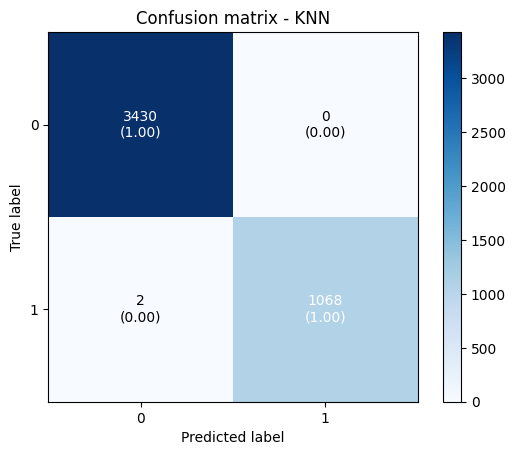

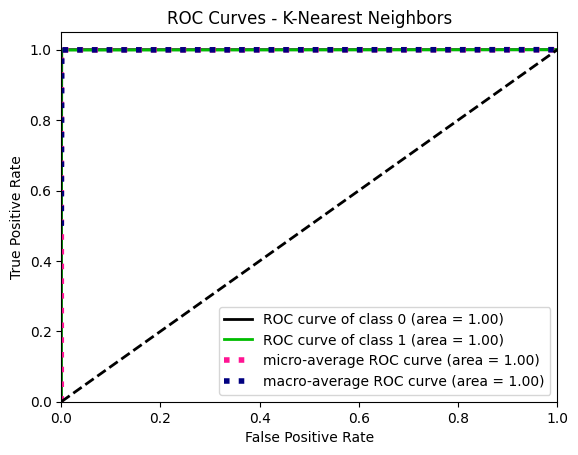

In [6]:
# Results Analysis
knn_model = knn.fit(X_train, y_train)
knn_y_model = knn_model.predict(X=X_test)
knn_y_prob = knn_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,knn_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - KNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plot = skplt.metrics.plot_roc(y_test, knn_y_prob)
plt.title("ROC Curves - K-Nearest Neighbors")

### Random Forest

In [8]:
# Random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predictions
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

# Print Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<ipython-input-8-cc7e5572b8f6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[[3430    0]
 [   2 1068]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3430
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



<ipython-input-9-206de5f48d54>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model = rfc.fit(X_train, y_train)


Text(0.5, 1.0, 'ROC Curves - Random Forest Classifier')

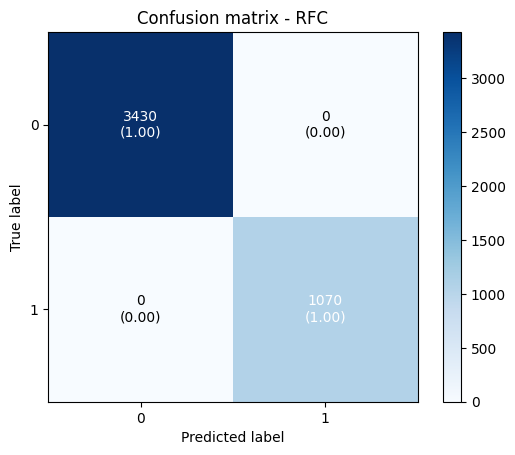

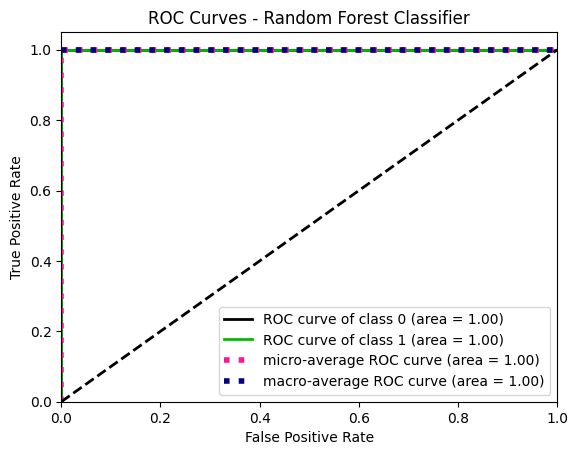

In [9]:
# Results analysis
rfc_model = rfc.fit(X_train, y_train)
rfc_y_model = rfc_model.predict(X=X_test)
rfc_y_prob = rfc_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rfc_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - RFC")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, rfc_y_prob)
plt.title("ROC Curves - Random Forest Classifier")

### Naive Bayes

In [10]:
# Naive Bayes model creation
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = GNB.predict(X_test)

# Print results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3430    0]
 [   0 1070]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3430
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'ROC Curves - The Naïve Bayes')

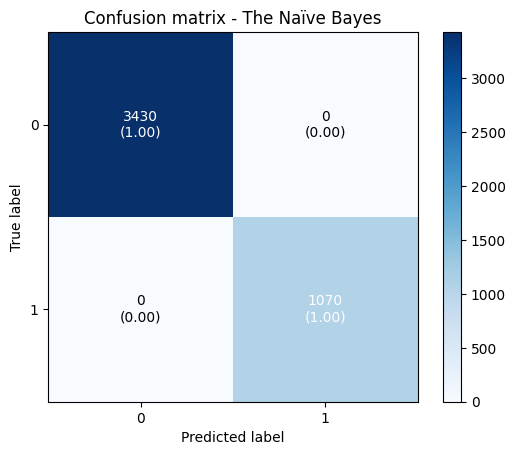

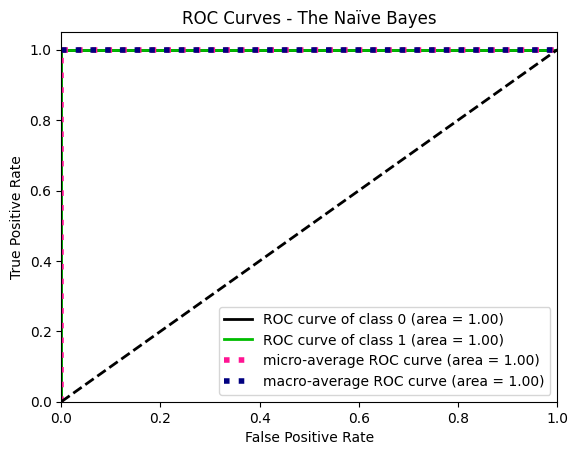

In [11]:
# Results analysis
GNB_model = GNB.fit(X_train, y_train)
GNB_y_model = GNB_model.predict(X=X_test)
GNB_y_prob = GNB_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,GNB_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - The Naïve Bayes")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, GNB_y_prob)
plt.title("ROC Curves - The Naïve Bayes")

### Logistic Regression

In [12]:
# logistic regression model creation
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# predictions
lr_predict = lr.predict(X_test)

# evaluation
print(confusion_matrix(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

[[3430    0]
 [   0 1070]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3430
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'ROC Curves - Logistic Regression')

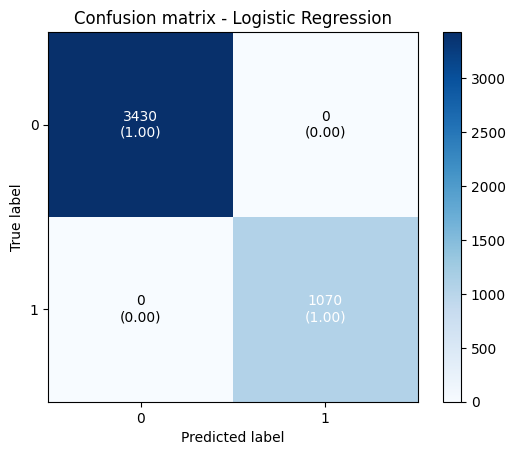

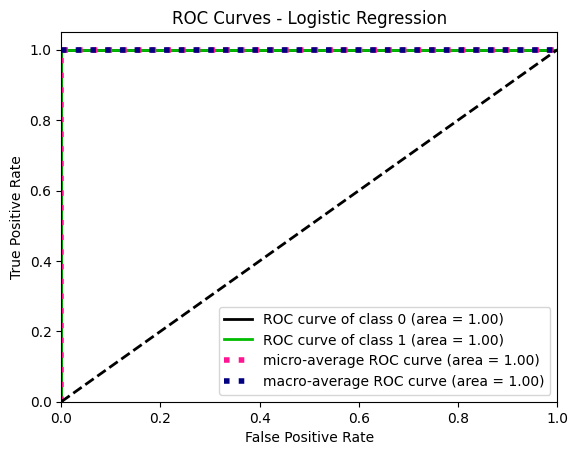

In [13]:
# Result analysis
lr_model = lr.fit(X_train, y_train)
lr_y_model = lr_model.predict(X=X_test)
lr_y_prob = lr_model.predict_proba(X=X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,lr_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, lr_y_prob)
plt.title("ROC Curves - Logistic Regression")

### MLP Neural Network

In [14]:
# neural network model creation
nn = Sequential()
nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training
nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# predictions
nn_prob = nn.predict(X_test)
nn_prob_2d = np.concatenate((1-nn_prob, nn_prob), axis=1)
nn_predict = (nn_prob > 0.5).astype(int)

# evaluation
print(confusion_matrix(y_test, nn_predict))
print(classification_report(y_test, nn_predict))

141/141 [==============================] - 0s 1ms/step
[[3430    0]
 [   0 1070]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3430
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



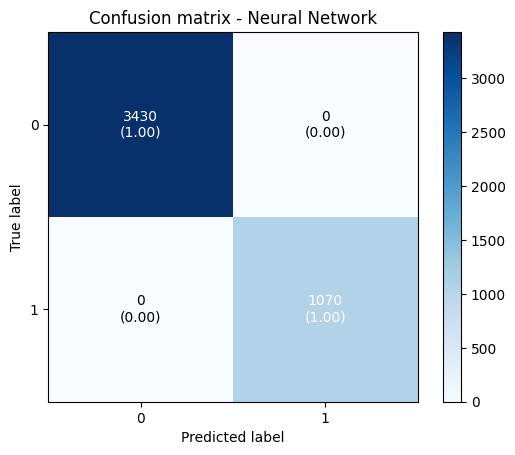

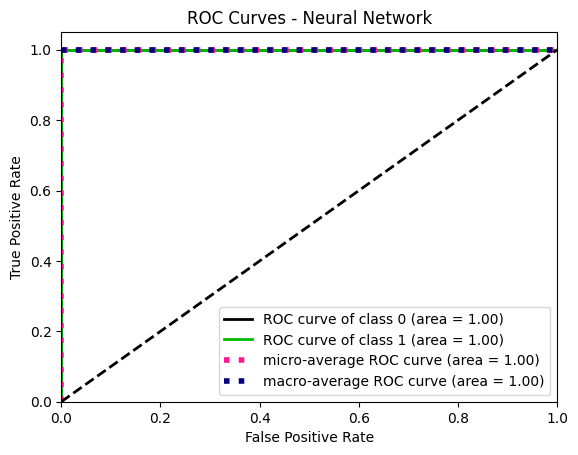

In [15]:
# Result analysis
y_test = np.array(y_test).ravel()
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,nn_predict),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - Neural Network")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plot = skplt.metrics.plot_roc(y_test, nn_prob_2d)
plt.title("ROC Curves - Neural Network")
plt.show()

## Model Variable Importances

In [42]:
def plot_variable_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = list(feature_names)  # convert to list
        feature_names = [feature_names[i] for i in indices]  # index as list

        plt.figure()
        plt.title("Variable Importances")
        plt.bar(range(len(feature_names)), importances[indices])
        plt.xticks(range(len(feature_names)), feature_names, rotation=90)
        plt.xlim([-1, len(feature_names)])
        plt.tight_layout()
        plt.show()
    else:
        print('Model does not have feature importances')


Model does not have feature importances


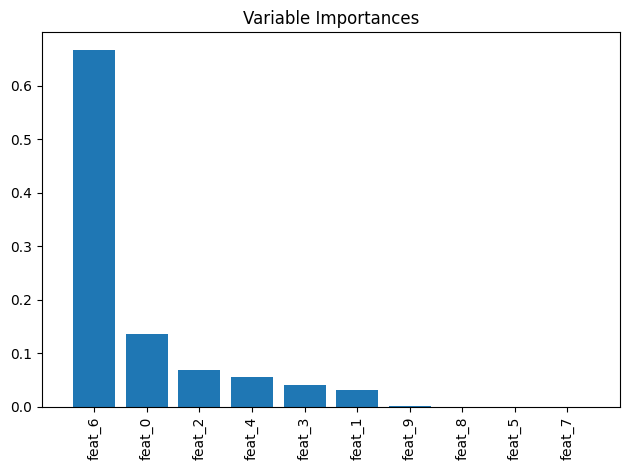

Model does not have feature importances
Model does not have feature importances
Model does not have feature importances


In [45]:
# Get feature names
feature_names = ["feat_{}".format(i) for i in range(X.shape[1])]

# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Plot variable importances for the KNN model
plot_variable_importance(knn, feature_names)

# Plot variable importances for the Random Forest model
plot_variable_importance(rfc, feature_names)

# Plot variable importances for the Naive Bayes model
plot_variable_importance(GNB_model, feature_names)

# Plot variable importances for the SVM model
plot_variable_importance(lr_model, feature_names)

# Plot variable importances for the XGBoost model
plot_variable_importance(nn, feature_names)
